In [164]:
import pandas as pd
%pip install pm4py
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Note: you may need to restart the kernel to use updated packages.


In [165]:
#get log from XES file
log_permit = xes_importer.apply("C:/Users/chiar/OneDrive/Desktop/BIS EXAM 2/PermitLog.xes/PermitLog.xes")


# Convert to DataFrame
df_permit = log_converter.apply(log_permit, variant=log_converter.Variants.TO_DATA_FRAME)


df_permit['time:timestamp'] = pd.to_datetime(df_permit['time:timestamp'])
#df_permit['concept:name'] = df_permit['concept:name'].astype(str)

# Verify
print(f"Number of cases: {len(log_permit)}")
print(f"Number of events: {sum(len(trace) for trace in log_permit)}")

df_permit

parsing log, completed traces :: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7065/7065 [00:03<00:00, 2183.28it/s]


Number of cases: 7065
Number of events: 86581


id  org:resource  \
0      rv_travel permit 76455_6  STAFF MEMBER   
1      rv_travel permit 76455_7  STAFF MEMBER   
2               st_step 76459_0  STAFF MEMBER   
3               st_step 76460_0  STAFF MEMBER   
4               st_step 76461_0  STAFF MEMBER   
...                         ...           ...   
86576           st_step 13113_0  STAFF MEMBER   
86577  rv_travel permit 13108_6  STAFF MEMBER   
86578           st_step 13112_0  STAFF MEMBER   
86579           st_step 13114_0  STAFF MEMBER   
86580  rv_travel permit 13108_7  STAFF MEMBER   

                              concept:name            time:timestamp  \
0                               Start trip 2016-10-05 00:00:00+00:00   
1                                 End trip 2016-10-05 00:00:00+00:00   
2             Permit SUBMITTED by EMPLOYEE 2017-04-06 13:32:10+00:00   
3      Permit FINAL_APPROVED by SUPERVISOR 2017-04-06 13:32:28+00:00   
4        Declaration SUBMITTED by EMPLOYEE 2017-04-07 13:38:14+00:00   
...                                    ...                       ...   
86576    Permit APPROVED by ADMINISTRATION 2018-12-30 15:11:51+00:00   
86577                           Start trip 2019-01-02 00:00:00+00:00   
86578        Permit APPROVED by SUPERVISOR 2019-01-02 09:11:23+00:00   
86579    Permit FINAL_APPROVED by DIRECTOR 2019-01-07 14:03:29+00:00   
86580                             End trip 2019-01-16 00:00:00+00:00   

             org:role  case:OrganizationalEntity case:ProjectNumber  \
0            EMPLOYEE  organizational unit 65458            UNKNOWN   
1            EMPLOYEE  organizational unit 65458            UNKNOWN   
2            EMPLOYEE  organizational unit 65458            UNKNOWN   
3          SUPERVISOR  organizational unit 65458            UNKNOWN   
4            EMPLOYEE  organizational unit 65458            UNKNOWN   
...               ...                        ...                ...   
86576  ADMINISTRATION  organizational unit 65464      project 13110   
86577        EMPLOYEE  organizational unit 65464      project 13110   
86578      SUPERVISOR  organizational unit 65464      project 13110   
86579        DIRECTOR  organizational unit 65464      project 13110   
86580        EMPLOYEE  organizational unit 65464      project 13110   

      case:TaskNumber      case:dec_id_0 case:ActivityNumber  ...  \
0             UNKNOWN  declaration 76457      activity 46005  ...   
1             UNKNOWN  declaration 76457      activity 46005  ...   
2             UNKNOWN  declaration 76457      activity 46005  ...   
3             UNKNOWN  declaration 76457      activity 46005  ...   
4             UNKNOWN  declaration 76457      activity 46005  ...   
...               ...                ...                 ...  ...   
86576        task 427                NaN             UNKNOWN  ...   
86577        task 427                NaN             UNKNOWN  ...   
86578        task 427                NaN             UNKNOWN  ...   
86579        task 427                NaN             UNKNOWN  ...   
86580        task 427                NaN             UNKNOWN  ...   

       case:Cost Type_14 case:Cost Type_10 case:Cost Type_11  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               NaN   
3                    NaN               NaN               NaN   
4                    NaN               NaN               NaN   
...                  ...               ...               ...   
86576                NaN               NaN               NaN   
86577                NaN               NaN               NaN   
86578                NaN               NaN               NaN   
86579                NaN               NaN               NaN   
86580                NaN               NaN               NaN   

       case:Cost Type_12 case:Task_5 case:Task_4 case:Task_9  case:Task_8  \
0                    NaN         NaN         Na

In [166]:
# Sort by case ID and timestamp domestic
df_permit = df_permit.sort_values(by=['case:concept:name', 'time:timestamp'])

# Get start and end activities for each case
start_activities = pm4py.get_start_activities(df_permit)
end_activities = pm4py.get_end_activities(df_permit)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))


Start activities: {'Permit SUBMITTED by EMPLOYEE': 6319, 'Start trip': 734, 'Permit SAVED by EMPLOYEE': 12}
End activities: {'Payment Handled': 5474, 'Send Reminder': 991, 'End trip': 453, 'Permit REJECTED by EMPLOYEE': 31, 'Permit FINAL_APPROVED by SUPERVISOR': 14, 'Declaration SAVED by EMPLOYEE': 28, 'Permit SAVED by EMPLOYEE': 4, 'Declaration REJECTED by EMPLOYEE': 28, 'Request Payment': 1, 'Declaration REJECTED by SUPERVISOR': 1, 'Permit REJECTED by MISSING': 38, 'Declaration REJECTED by MISSING': 2}


In [167]:


# Filter log: da 'Permit SUBMITTED by EMPLOYEE' a 'Payment Handled'
filter_log_permit = pm4py.filter_start_activities(log_permit, ['Permit SUBMITTED by EMPLOYEE'])
filter_log_permit = pm4py.filter_end_activities(filter_log_permit, ['Payment Handled'])

# Sub-log 1: da 'Permit SUBMITTED by EMPLOYEE' a 'End trip'
end_trip_log = pm4py.filter_start_activities(log_permit, ['Permit SUBMITTED by EMPLOYEE'])
end_trip_log = pm4py.filter_end_activities(end_trip_log, ['End trip'])

# Sub-log 2: da 'Permit SUBMITTED by EMPLOYEE' a 'Send Reminder'
send_reminder_log = pm4py.filter_start_activities(log_permit, ['Permit SUBMITTED by EMPLOYEE'])
send_reminder_log = pm4py.filter_end_activities(send_reminder_log, ['Send Reminder'])

# Sub-log 3: da 'Start trip' a 'Payment Handled'
no_permit_but_paid_log = pm4py.filter_start_activities(log_permit, ['Start trip'])
no_permit_but_paid_log = pm4py.filter_end_activities(no_permit_but_paid_log, ['Payment Handled'])

# Count cases
def count_cases(filtered_log):
    return len(set(trace.attributes['concept:name'] for trace in filtered_log))

print("Main filtered log (submit ‚Üí payment):", count_cases(filter_log_permit))
print("Submit ‚Üí End trip:", count_cases(end_trip_log))
print("Submit ‚Üí Send Reminder:", count_cases(send_reminder_log))
print("Start trip ‚Üí Payment:", count_cases(no_permit_but_paid_log))


Main filtered log (submit ‚Üí payment): 4898
Submit ‚Üí End trip: 410
Submit ‚Üí Send Reminder: 917
Start trip ‚Üí Payment: 576


In [168]:
#REMOVE CASES WITHOUT PERMIT APPROVAL

df_filtered_permit = log_converter.apply(filter_log_permit, variant=log_converter.Variants.TO_DATA_FRAME)

all_case_ids = df_filtered_permit['case:concept:name'].unique()


cases_with_approval = df_filtered_permit[
    df_filtered_permit['concept:name'] == 'Permit FINAL_APPROVED by SUPERVISOR'
]['case:concept:name'].unique()

cases_without_approval = set(all_case_ids) - set(cases_with_approval)

print(f"Total cases: {len(all_case_ids)}")
print(f"Cases with final approve: {len(cases_with_approval)}")
print(f"Cases without final approve: {len(cases_without_approval)}")


df_no_approval = df_filtered_permit[df_filtered_permit['case:concept:name'].isin(cases_without_approval)]

df_filtered_permit = df_filtered_permit[df_filtered_permit['case:concept:name'].isin(cases_with_approval)]

log_permit_approved = log_converter.apply(df_filtered_permit, variant=log_converter.Variants.TO_EVENT_LOG)


Total cases: 4898
Cases with final approve: 4381
Cases without final approve: 517


In [169]:
#remove cases with declaration delayed more than 60 days after trip end
# 1. get time between End trip and Declaration SUBMITTED
def time_after_trip(gruppo):
    if 'End trip' in gruppo['concept:name'].values and 'Declaration SUBMITTED by EMPLOYEE' in gruppo['concept:name'].values:
        t_end = gruppo[gruppo['concept:name'] == 'End trip']['time:timestamp'].iloc[0]
        t_decl = gruppo[gruppo['concept:name'] == 'Declaration SUBMITTED by EMPLOYEE']['time:timestamp'].iloc[0]
        delta_days = (t_decl - t_end).total_seconds() / 86400
        return delta_days
    return np.nan

# 2. apply function to each case
time_after_trip = df_filtered_permit.groupby("case:concept:name").apply(time_after_trip).dropna()

# 3. identify violating cases
casi_fuori_policy = time_after_trip[time_after_trip > 60]
case_ids_fuori_policy = set(casi_fuori_policy.index)

# 4. remove those cases from the DataFrame
df_filtered_permit= df_filtered_permit[
    ~df_filtered_permit['case:concept:name'].isin(case_ids_fuori_policy)
]

# 5. Output riepilogativo
print(f"Casi totali con dichiarazione post-viaggio validi: {len(time_after_trip)}")
print(f"Rimossi {len(casi_fuori_policy)} casi con dichiarazione oltre i 60 giorni ({len(casi_fuori_policy)/len(time_after_trip)*100:.2f}%)")
print(f"Casi rimasti nel dataset: {df_filtered_permit['case:concept:name'].nunique()}")



Casi totali con dichiarazione post-viaggio validi: 4379
Rimossi 139 casi con dichiarazione oltre i 60 giorni (3.17%)
Casi rimasti nel dataset: 4242


C:\Users\chiar\AppData\Local\Temp\ipykernel_48700\693769767.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_after_trip = df_filtered_permit.groupby("case:concept:name").apply(time_after_trip).dropna()


Lead time mean: 72.25 giorni
Lead time median: 62.21 giorni


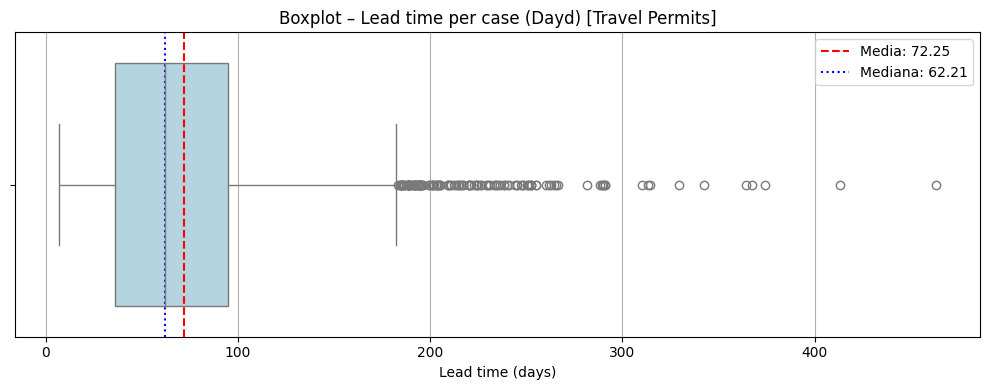

In [170]:
#LEAD TIME
df_filtered_permit = log_converter.apply(log_permit_approved, variant=log_converter.Variants.TO_DATA_FRAME)


lead_time_p = df_filtered_permit.groupby("case:concept:name")["time:timestamp"].agg(
    lambda x: (x.max() - x.min()).total_seconds()
)


lead_time_days_p = lead_time_p / 86400
avg_lead_time_days_p = lead_time_days_p.mean()
median_lead_time_days_p = lead_time_days_p.median()

# Output testuale
print(f"Lead time mean: {avg_lead_time_days_p:.2f} giorni")
print(f"Lead time median: {median_lead_time_days_p:.2f} giorni")

# Boxplot della distribuzione dei lead time
plt.figure(figsize=(10, 4))
sns.boxplot(x=lead_time_days_p, color='lightblue')
plt.title("Boxplot ‚Äì Lead time per case (Dayd) [Travel Permits]")
plt.xlabel("Lead time (days)")
plt.grid(True, axis='x')

# Annotazioni: media e mediana
plt.axvline(avg_lead_time_days_p, color='red', linestyle='--', label=f'Media: {avg_lead_time_days_p:.2f}')
plt.axvline(median_lead_time_days_p, color='blue', linestyle=':', label=f'Mediana: {median_lead_time_days_p:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


Test di Shapiro-Wilk ‚Äì p-value: 0.00000
Distribution id NOT normal (p < 0.05)
Mean: 72.25 days ‚Äì Deviazione standard: 47.80 days


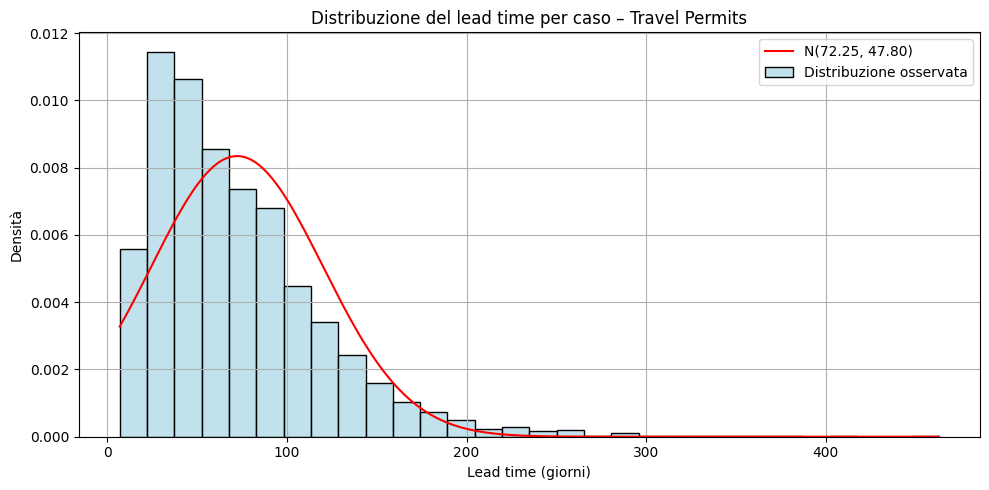

In [171]:
from scipy.stats import norm
# Campione massimo 500 per test di Shapiro-Wilk
sample_p = lead_time_days_p
if len(lead_time_days_p) > 500:
    sample_p = lead_time_days_p.sample(500, random_state=42)

# Test di Shapiro-Wilk
shapiro_stat_p, shapiro_pval_p = stats.shapiro(sample_p)
print(f"Test di Shapiro-Wilk ‚Äì p-value: {shapiro_pval_p:.5f}")
if shapiro_pval_p < 0.05:
    print("Distribution id NOT normal (p < 0.05)")
else:
    print("Distribution is normal (p ‚â• 0.05)")


mu_p = lead_time_days_p.mean()
sigma_p = lead_time_days_p.std()
print(f"Mean: {mu_p:.2f} days ‚Äì Deviazione standard: {sigma_p:.2f} days")


plt.figure(figsize=(10, 5))

sns.histplot(lead_time_days_p, stat="density", bins=30, kde=False, color="lightblue", label="Distribuzione osservata")

# KDE stimata
#sns.kdeplot(lead_time_days_p, color="blue", label="KDE osservata")

# normal distribution curve
x = np.linspace(lead_time_days_p.min(), lead_time_days_p.max(), 200)
plt.plot(x, norm.pdf(x, mu_p, sigma_p), color='red', label=f'N({mu_p:.2f}, {sigma_p:.2f})')

# Etichette e legenda
plt.title("Distribuzione del lead time per caso ‚Äì Travel Permits")
plt.xlabel("Lead time (giorni)")
plt.ylabel("Densit√†")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [172]:
# IQR
q1_lt_p = lead_time_days_p.quantile(0.25)
q3_lt_p = lead_time_days_p.quantile(0.75)
iqr_lt_p = q3_lt_p - q1_lt_p

lower_bound_lt_p = q1_lt_p - 1.5 * iqr_lt_p
upper_bound_lt_p = q3_lt_p + 1.5 * iqr_lt_p

# Selection outlier 
outliers_lt_p = lead_time_days_p[(lead_time_days_p < lower_bound_lt_p) | (lead_time_days_p > upper_bound_lt_p)]
n_outliers_lt_p = len(outliers_lt_p)

total_cases_p = len(lead_time_days_p)

perc_outliers_lt_p = n_outliers_lt_p / total_cases_p * 100

# Output
print(f"Total cases: {total_cases_p}")
print(f" Outlier per duration (lead time): {n_outliers_lt_p} casi ({perc_outliers_lt_p:.2f}%)")


Total cases: 4381
 Outlier per duration (lead time): 133 casi (3.04%)


In [173]:

outlier_case_ids_p = set(outliers_lt_p.index)

#remove outliers from df_filtered_permit
df_filtered_permit = df_filtered_permit[
    ~df_filtered_permit["case:concept:name"].isin(outlier_case_ids_p)
]


print(f"NUmber of cases after removing outlier: {df_filtered_permit['case:concept:name'].nunique()}")


NUmber of cases after removing outlier: 4248


In [174]:
#RICALCOLO LEAD TIME DOPO RIMOZIONE OUTLIER

lead_times_p = df_filtered_permit.groupby("case:concept:name")["time:timestamp"].agg(
    lambda x: (x.max() - x.min()).total_seconds()
)


lead_time_days_p = lead_times_p / 86400
avg_lead_time_days_p = lead_time_days_p.mean()
median_lead_time_days_p = lead_time_days_p.median()

# Output adjusted
print(f"New mean lead time: {avg_lead_time_days_p:.2f} giorni")
print(f"New median lead time: {median_lead_time_days_p:.2f} giorni")


New mean lead time: 67.35 giorni
New median lead time: 60.08 giorni


In [175]:
#enough time between permit approval and trip start

df_app_start = df_filtered_permit[
    df_filtered_permit['concept:name'].isin(['Permit FINAL_APPROVED by SUPERVISOR', 'Start trip'])
]

df_app_start = df_app_start.sort_values(by=['case:concept:name', 'time:timestamp'])

#get difference for each case
def delta(gruppo):
    if 'Permit FINAL_APPROVED by SUPERVISOR' in gruppo['concept:name'].values and 'Start trip' in gruppo['concept:name'].values:
        t_approvazione = gruppo[gruppo['concept:name'] == 'Permit FINAL_APPROVED by SUPERVISOR']['time:timestamp'].iloc[0]
        t_partenza = gruppo[gruppo['concept:name'] == 'Start trip']['time:timestamp'].iloc[0]
        return (t_partenza - t_approvazione).total_seconds() / 86400  
    else:
        return np.nan

# Apply function
pre_trip = df_app_start.groupby("case:concept:name").apply(delta).dropna()


mean_confirmation_time = pre_trip.mean()
median_confirmation_time = pre_trip.median()

print(f"Mean Advance confirmation before trip: {mean_confirmation_time:.2f} days")



# cases with notice <1 day
pre_trip_min = pre_trip[pre_trip < 1]

# cases with approval after trip start
error_cases = pre_trip[pre_trip < 0]

# Output
print(f"Cases with notice < 1 day: {len(pre_trip_min)} ({len(pre_trip_min) / len(pre_trip) * 100:.2f}%)")
print(f"cases approved after trip start: {len(error_cases)} ({len(error_cases) / len(pre_trip) * 100:.2f}%)")

# Opzionale: ispezione dettagliata dei casi anomali
df_errors = df_filtered_permit[df_filtered_permit['case:concept:name'].isin(error_cases.index)]



Mean Advance confirmation before trip: 33.29 days
Cases with notice < 1 day: 481 (11.32%)
cases approved after trip start: 339 (7.98%)


C:\Users\chiar\AppData\Local\Temp\ipykernel_48700\2056151714.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre_trip = df_app_start.groupby("case:concept:name").apply(delta).dropna()


In [176]:
#remove cases with permit after start trip

case_ids_error = set(error_cases.index)

df_filtered_permit = df_filtered_permit[
    ~df_filtered_permit["case:concept:name"].isin(case_ids_error)
]


filter_log_permit = log_converter.apply(df_filtered_permit, variant=log_converter.Variants.TO_EVENT_LOG)

# Rimuovi anche dal Series dell‚Äôanticipo per mantenerlo coerente
anticipo_viaggio = pre_trip[~pre_trip.index.isin(case_ids_error)]



In [177]:
#Mean time between specific activities
def intra_activity_time(df, attivit√†1, attivit√†2):
    results = []

    for case_id, gruppo in df.groupby("case:concept:name"):
        att1 = gruppo[gruppo["concept:name"] == attivit√†1]
        att2 = gruppo[gruppo["concept:name"] == attivit√†2]

        if not att1.empty and not att2.empty:
            t1 = att1["time:timestamp"].iloc[0]
            t2 = att2["time:timestamp"].iloc[0]
            delta_days = (t2 - t1).total_seconds() / 86400
            results.append(delta_days)

    if results:
        media = np.mean(results)
        mediana = np.median(results)
        print(f"‚è±Ô∏è Tempo medio da '{attivit√†1}' a '{attivit√†2}': {media:.2f} giorni")
        
       
    else:
        print(f"Nessun caso con entrambe le attivit√† '{attivit√†1}' e '{attivit√†2}' trovate.")
    
    return results

permit_submit_appr= intra_activity_time(df_filtered_permit, "Permit SUBMITTED by EMPLOYEE", "Permit FINAL_APPROVED by SUPERVISOR")
endTrip_declaration= intra_activity_time(df_filtered_permit, "End trip", "Declaration SUBMITTED by EMPLOYEE")
endTrip_sendReminder= intra_activity_time(df_filtered_permit, "End trip", "Send Reminder")
requestPay_PaymHandle= intra_activity_time(df_filtered_permit, "Request For Payment SUBMITTED by EMPLOYEE", "Payment Handled")



‚è±Ô∏è Tempo medio da 'Permit SUBMITTED by EMPLOYEE' a 'Permit FINAL_APPROVED by SUPERVISOR': 3.07 giorni
‚è±Ô∏è Tempo medio da 'End trip' a 'Declaration SUBMITTED by EMPLOYEE': 10.80 giorni
‚è±Ô∏è Tempo medio da 'End trip' a 'Send Reminder': 42.52 giorni
‚è±Ô∏è Tempo medio da 'Request For Payment SUBMITTED by EMPLOYEE' a 'Payment Handled': 10.46 giorni


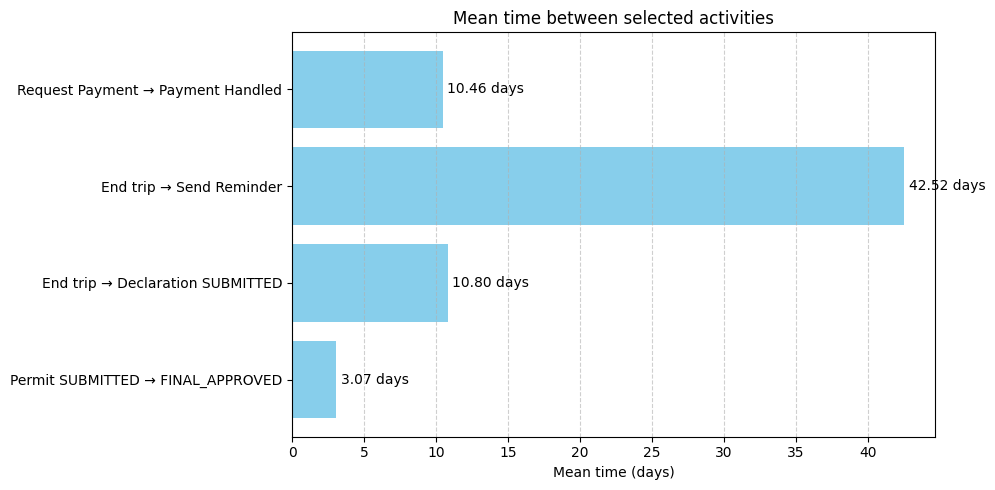

In [180]:
tempi_medi = {
    "Permit SUBMITTED ‚Üí FINAL_APPROVED": np.mean(permit_submit_appr),
    "End trip ‚Üí Declaration SUBMITTED": np.mean(endTrip_declaration),
    "End trip ‚Üí Send Reminder": np.mean(endTrip_sendReminder),
    "Request Payment ‚Üí Payment Handled": np.mean(requestPay_PaymHandle),
   
}

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(list(tempi_medi.keys()), list(tempi_medi.values()), color='skyblue')
plt.xlabel("Mean time (days)")
plt.title("Mean time between selected activities")

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f} days", va='center')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

üìä Casi con almeno un rework: 1713/3909 (43.82%)


C:\Users\chiar\AppData\Local\Temp\ipykernel_48700\849833711.py:25: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chiar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


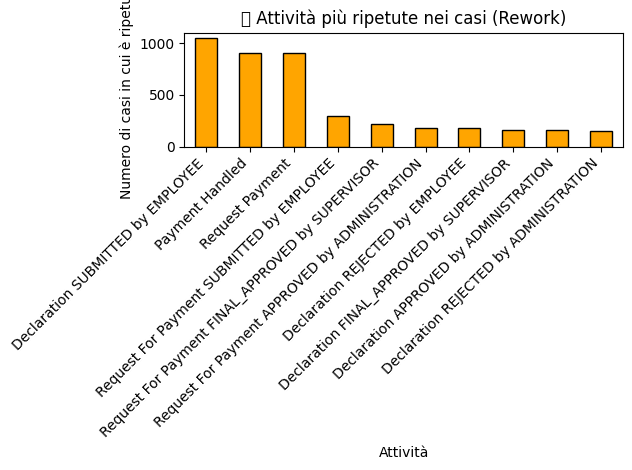

In [179]:
# Raggruppa per caso e attivit√† e conta le occorrenze
activity_repetitions = df_filtered_permit.groupby(['case:concept:name', 'concept:name']).size().reset_index(name='count')
rework_cases = activity_repetitions[activity_repetitions['count'] > 1]
# Attivit√† che subiscono rework
reworked_activities = rework_cases['concept:name'].value_counts()

# Casi con almeno un'attivit√† ripetuta
cases_with_rework = rework_cases['case:concept:name'].nunique()

# Totale dei casi
total_cases = df_filtered_permit['case:concept:name'].nunique()

# Percentuale casi con rework
perc_rework = (cases_with_rework / total_cases) * 100

print(f"üìä Casi con almeno un rework: {cases_with_rework}/{total_cases} ({perc_rework:.2f}%)")

import matplotlib.pyplot as plt

reworked_activities.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("üîÅ Attivit√† pi√π ripetute nei casi (Rework)")
plt.ylabel("Numero di casi in cui √® ripetuta")
plt.xlabel("Attivit√†")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

